In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introdução

Como parte da finalização do Curso de Python 2023 da FEA.dev, mediante apresentação de prjeto final de análise de dados, o presente trabalho buscou analisar cidades brasileiras, seguindo dados, inclusive, do IBGE.

Para tal, foi utilizado o dataset "brazilian_cities" disponível em https://www.kaggle.com/datasets/crisparada/brazilian-cities, o qual mostra 79/80 atributos para cada uma das cidades brasileiras.

A ideia central é verificar qual das seguintes hipóteses (mutuamente excludentes) é a verdadeira:

*H1:* as cidades com maior IDH apresentam maior população

*H2:* as cidades com maior IDH apresentam menor população

*H3:* os dados de IDH vs população são inconclusivos, não havendo nítida correlação entre as duas métricas

## Dados

Para o devido entendimento dos dados, foi feita, primeiramente, uma análise inicial dos arquivos disponíveis no link do kaggle via Excel. Com isso, observou-se o seguinte:

*BRAZIL_CITIES_REV2022.csv*: dataset em si, apresentando a listagem de cidades nas linhas e as demais informações nas colunas

*Data_Dictionary.csv*: arquivo que descreve as colunas do dataset oficial, visando a facilitar o entendimento dos dados e agilizar suas análises

In [2]:
# Resumindo as colunas

colunas = pd.read_excel("Data_Dictionary.xlsx")

display(colunas[['FIELD', 'DESCRIPTION']])

,FIELD,DESCRIPTION
0,CITY,Name of the City
1,STATE,Name of the State
2,CAPITAL,1 if Capital of State
3,IBGE_RES_POP,Resident Population
4,IBGE_RES_POP_BRAS,Resident Population Brazilian
...,...,...
76,Wheeled_tractor,Total number of wheeled tractors
77,UBER,1 if UBER
78,MAC,Total number of Mac Donalds stores
79,WALLMART,Total number of Walmart Stores


In [3]:
# Lendo o dataset

df = pd.read_csv("BRAZIL_CITIES_REV2022.csv", delimiter=",")

display(df)

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,...,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,...,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,...,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,...,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,...,2,44974716,371922572,6928,2953,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,Áurea,RS,0,3665,3665,0,1222,548,674,1525,...,2,0,117198141,1435,400,0,0,0,0,1
5574,Ângulo,PR,0,2859,2844,15,929,737,192,2246,...,0,0,0,898,415,0,0,0,0,1
5575,Érico Cardoso,BA,0,10859,10859,0,2659,542,2117,1999,...,0,0,0,655,1020,0,0,0,0,1
5576,Óbidos,PA,0,49333,49324,9,11263,6068,5195,25295,...,3,0,184494811,938,4985,0,0,0,0,1


In [4]:
# Verificando / Removendo valores nulos e duplicados

df.isna().sum()

CITY                 0
STATE                0
CAPITAL              0
IBGE_RES_POP         0
IBGE_RES_POP_BRAS    0
                    ..
Wheeled_tractor      0
UBER                 0
MAC                  0
WAL-MART             0
POST_OFFICES         0
Length: 81, dtype: int64

In [5]:
df.isnull().sum()

CITY                 0
STATE                0
CAPITAL              0
IBGE_RES_POP         0
IBGE_RES_POP_BRAS    0
                    ..
Wheeled_tractor      0
UBER                 0
MAC                  0
WAL-MART             0
POST_OFFICES         0
Length: 81, dtype: int64

In [6]:
# Obtendo lista de colunas

df.columns

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA',
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       'GVA_TOTAL', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies',
       'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'Pr_

In [7]:
# Filtrando apenas colunas que serão utilizadas na análise

df = df[['CITY', 'IBGE_RES_POP', 'IDHM']]

display(df)

,CITY,IBGE_RES_POP,IDHM
0,Abadia De Goiás,6876,0.708
1,Abadia Dos Dourados,6704,0.689
2,Abadiânia,15757,0.689
3,Abaetetuba,141100,0.628
4,Abaeté,22690,0.698
...,...,...,...
5573,Áurea,3665,0.707
5574,Ângulo,2859,0.721
5575,Érico Cardoso,10859,0.584
5576,Óbidos,49333,0.594


In [8]:
df = df.rename(columns={'CITY': 'Cidade', 'IBGE_RES_POP': 'População de 2010', 'IDHM': 'IDH'})

display(df)

,Cidade,População de 2010,IDH
0,Abadia De Goiás,6876,0.708
1,Abadia Dos Dourados,6704,0.689
2,Abadiânia,15757,0.689
3,Abaetetuba,141100,0.628
4,Abaeté,22690,0.698
...,...,...,...
5573,Áurea,3665,0.707
5574,Ângulo,2859,0.721
5575,Érico Cardoso,10859,0.584
5576,Óbidos,49333,0.594


In [9]:
# Verificando se há IDHs incondizentes

analise_1 = df[df['IDH'] == df['IDH'].min()]

display(analise_1)

,Cidade,População de 2010,IDH
436,Balneário Rincão,0,0.0
2666,Lagoa Dos Patos,0,0.0
2673,Lagoa Mirim,0,0.0
3079,Mojuí Dos Campos,0,0.0
3569,Paraíso Das Águas,0,0.0
3722,Pescaria Brava,0,0.0
3781,Pinto Bandeira,0,0.0
4456,Santa Terezinha,9648,0.0
4746,São Caetano,0,0.0
5066,São Vicente Do Seridó,10230,0.0


In [10]:
# Removendo dados com zero IDH

df = df.drop((analise_1['IDH'] == 0.0).index)

display(df)

,Cidade,População de 2010,IDH
0,Abadia De Goiás,6876,0.708
1,Abadia Dos Dourados,6704,0.689
2,Abadiânia,15757,0.689
3,Abaetetuba,141100,0.628
4,Abaeté,22690,0.698
...,...,...,...
5573,Áurea,3665,0.707
5574,Ângulo,2859,0.721
5575,Érico Cardoso,10859,0.584
5576,Óbidos,49333,0.594


In [11]:
# Verificando se há populações incondizentes

analise_2 = df[df['População de 2010'] == df['População de 2010'].min()]

display(analise_2)

,Cidade,População de 2010,IDH
4448,Santa Teresinha,0,0.587
5070,São Vicente do Seridó,0,0.555


In [12]:
# Removendo dados com zero população

df = df.drop((analise_2['População de 2010'] == 0).index)

display(df)

,Cidade,População de 2010,IDH
0,Abadia De Goiás,6876,0.708
1,Abadia Dos Dourados,6704,0.689
2,Abadiânia,15757,0.689
3,Abaetetuba,141100,0.628
4,Abaeté,22690,0.698
...,...,...,...
5573,Áurea,3665,0.707
5574,Ângulo,2859,0.721
5575,Érico Cardoso,10859,0.584
5576,Óbidos,49333,0.594


In [13]:
# Para definir objetivamente as cidades com mais ou menos população, optou-se por aplicar um filtro e definir aquelas que possuem uma população acima da média populacional esperada para as cidades brasileiras, com base nos dados de 2010

# Para cidades com população acima da média, atribuiu-se a categoria 'A'. Para as demais, atribuiu-se 'B'

def acima_media(populacao):
    if populacao > df['População de 2010'].mean():
        return 'A'
    else:
        return 'B'

df['Grupo Populacional'] = df['População de 2010'].apply(acima_media)

display(df)

,Cidade,População de 2010,IDH,Grupo Populacional
0,Abadia De Goiás,6876,0.708,B
1,Abadia Dos Dourados,6704,0.689,B
2,Abadiânia,15757,0.689,B
3,Abaetetuba,141100,0.628,A
4,Abaeté,22690,0.698,B
...,...,...,...,...
5573,Áurea,3665,0.707,B
5574,Ângulo,2859,0.721,B
5575,Érico Cardoso,10859,0.584,B
5576,Óbidos,49333,0.594,A


In [14]:
# Agora, para que se verifiquem as hipóteses, agrupar-se-ão as linhas conforme o grupo populacional a elas atribuído

grouped = df.groupby('Grupo Populacional')[['IDH']].mean()

display(grouped)

,IDH
Grupo Populacional,
A,0.701261
B,0.651086


## Resultados

Nesta seção, serão utilizados gráficos para melhor visualização dos dados obtidos previamente, visando a validar as hipóteses (ou não) na etapa da conclusão

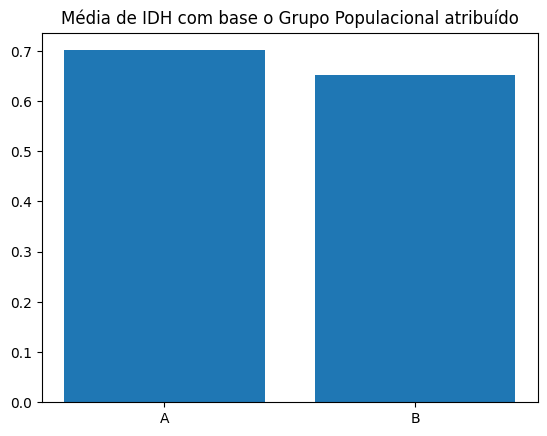

In [15]:
# Plotando média obtida na etapa anterior (dataframe 'grouped')

plt.bar(grouped.index, height=grouped['IDH'])
plt.title("Média de IDH com base o Grupo Populacional atribuído")
plt.show()

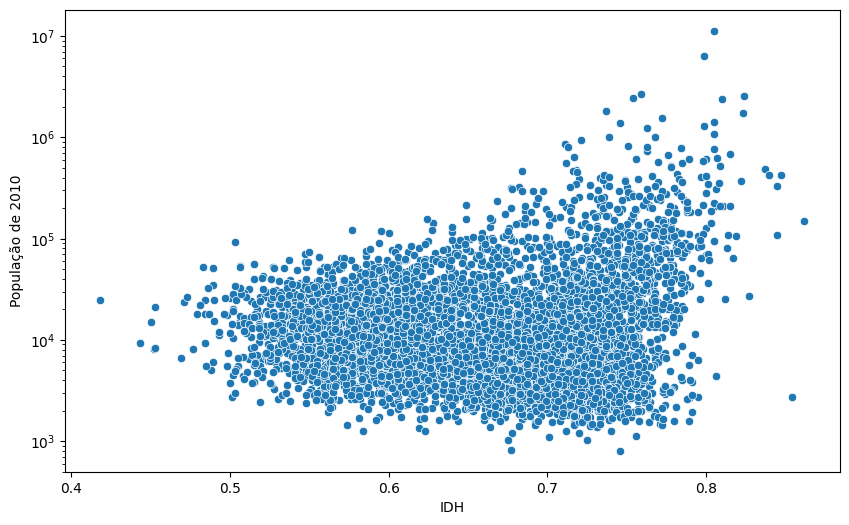

In [17]:
# Plotando gráfico da tabela inicial para melhor visualização da correlação entre IDH e população (utilizou-se escala logarítmica para incluir cidades de maior população sem prejuízo informacional nas de menor)

edited = df[['População de 2010', 'IDH']]

plt.figure(figsize=(10, 6))
sns.scatterplot(edited, x=edited['IDH'], y=edited['População de 2010']).set_yscale('log', base=10)

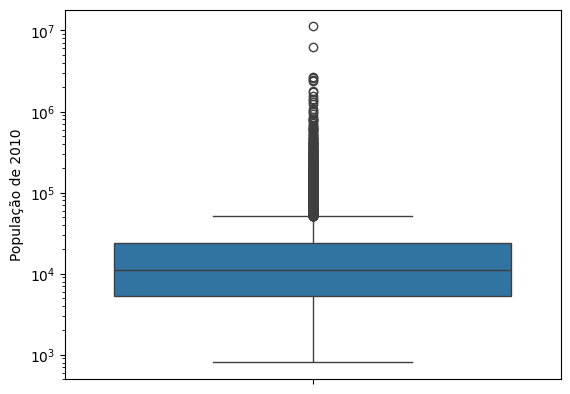

In [19]:
# Plotando população em boxplot (é bem provável que são paulo, por exemplo, fique como outlier)

sns.boxplot(df['População de 2010']).set_yscale('log', base=10)

## Conclusão

Conclui-se que, dentre as três hipóteses apresentadas, a hipótese abaixo é a verdadeira (anulando as demais)

*H1:* as cidades com maior IDH apresentam maior população

Além disso, faz-se interessante observar, para cada um dos gráficos elaborados, respectivamente:

- De fato, a média de IDH das cidades com maior população é superior às de menor. O tamanho das barras deixa essa comparação um pouco mais visual;

- Nota-se que há uma tendência de maior população para cidades de maior IDH, e vice-versa;

- Como curiosidade, é importante notar o número de outliers observado no boxplot. Considerando que a média populacional gira entorno de 30 mil habitantes, é de se esperar que muitas cidades terão populações superiores a isso e superarão o limite superior do boxplot (1,5 * intervalor IQ)